In [246]:
#Importing Libraries 
import pandas as pd
import numpy as np 
from scipy import stats
from matplotlib import pyplot as plt
import seaborn as sns

In [248]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
# Metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [249]:
ds=pd.read_csv("Sisfall.csv")
ds.head(5)

,ACTIVITY,TIME,SL,EEG,BP,HR,CIRCLUATION
0,3,4722.92,4019.64,-1600.00,13,79,317
1,2,4059.12,2191.03,-1146.08,20,54,165
2,2,4773.56,2787.99,-1263.38,46,67,224
3,4,8271.27,9545.98,-2848.93,26,138,554
4,4,7102.16,14148.80,-2381.15,85,120,809


In [302]:
ds = ds.replace({'ACTIVITY':{0:'Standing',1:'Walking',2:'Sitting',3:'Falling',4:'Cramps',5:'Running'}})
ds.head(10)

,ACTIVITY,TIME,HR
0,Falling,4722.92,79
1,Sitting,4059.12,54
2,Sitting,4773.56,67
3,Cramps,8271.27,138
4,Cramps,7102.16,120
5,Running,7015.24,95
6,Falling,8620.28,157
7,Falling,9238.73,196
8,Standing,12276.40,249
9,Cramps,14165.50,315


In [251]:
# List of columns to drop
columns_to_drop = ["SL", "EEG","BP","CIRCLUATION"]

In [263]:
#Drop the specified columns
ds = ds.drop(columns=columns_to_drop)
ds.head(5)

,ACTIVITY,TIME,HR
0,Falling,4722.92,79
1,Sitting,4059.12,54
2,Sitting,4773.56,67
3,Cramps,8271.27,138
4,Cramps,7102.16,120


In [264]:
ds.describe()

,TIME,HR
count,16382.000000,16382.000000
mean,10936.842478,211.536992
std,5261.463601,129.949521
min,1954.230000,33.000000
25%,7263.685000,119.000000
50%,9769.355000,180.000000
75%,13481.650000,271.000000
max,50895.500000,986.000000


In [265]:
ds.isna().sum()

ACTIVITY    0
TIME        0
HR          0
dtype: int64

/var/folders/yr/54gz15kd0tzbytjjm1sbtv3c0000gn/T/ipykernel_6989/35694123.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ds[cols[i]]);
/var/folders/yr/54gz15kd0tzbytjjm1sbtv3c0000gn/T/ipykernel_6989/35694123.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ds[cols[i]]);


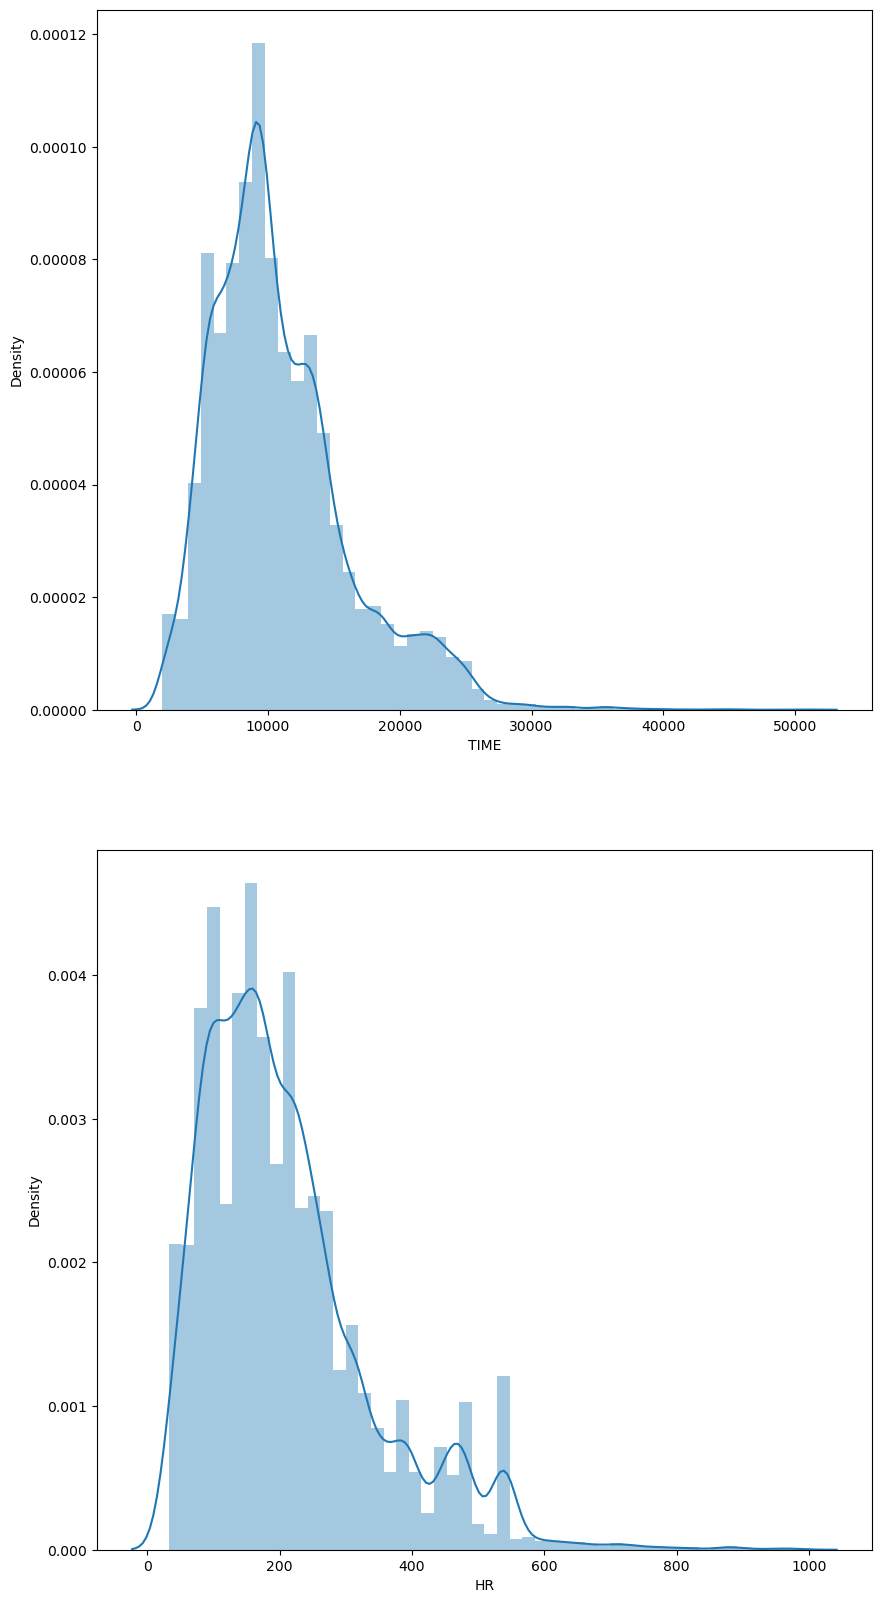

In [268]:
cols=['TIME','HR']
#Distribution
fig = plt.figure(figsize=(10, 20)) 
for i in range (0,len(cols)):
    fig.add_subplot(len(cols),1,i+1)
    sns.distplot(ds[cols[i]]);

<Axes: >

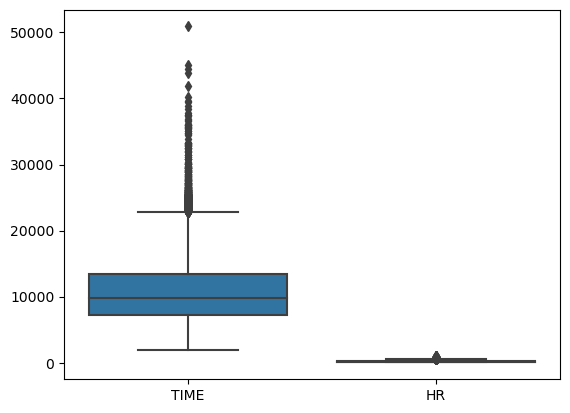

In [269]:
sns.boxplot(data=ds)

In [275]:
Target = ds['ACTIVITY']
Features = ds[['TIME','HR']]

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(Features, Target, test_size = 0.3)


In [276]:
rfc = RandomForestClassifier(
    n_estimators = 50,
    #min_samples_leaf=10,
    #min_samples_split=10
)
rfc.fit(X_train, y_train)
predictions = rfc.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
accuracy


0.5857578840284843

In [296]:
# Define a threshold for fluctuation detection (e.g., 10 beats per minute)
threshold = 10
# Detect fluctuations based on the threshold
predictions = (Features['HR'].diff() > threshold).astype(int)

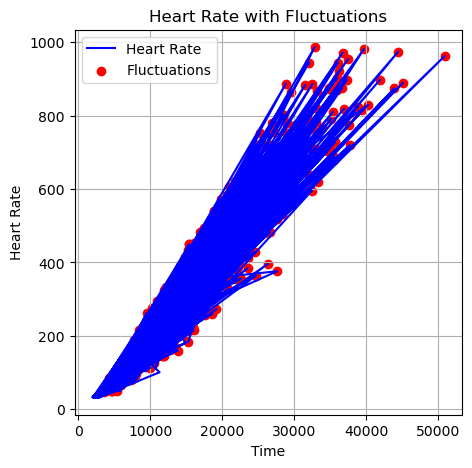

In [298]:
# Define a threshold for fluctuation detection (e.g., 10 beats per minute)
threshold = 10
# Detect fluctuations based on the threshold
fluctuations = (Features['HR'].diff() > threshold).astype(int)

# Create a time series plot of heart rate
plt.figure(figsize=(5, 5))
plt.plot(Features['TIME'], Features['HR'], label='Heart Rate', color='blue')
plt.scatter(Features['TIME'][fluctuations == 1], Features['HR'][fluctuations == 1], color='red', marker='o', label='Fluctuations')
plt.xlabel('Time')
plt.ylabel('Heart Rate')
plt.title('Heart Rate with Fluctuations')
plt.legend()
plt.grid(True)
plt.show()